In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


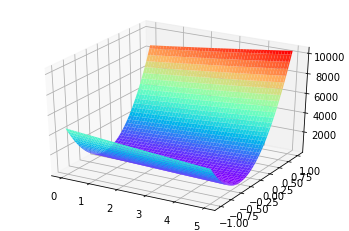

In [14]:
# y =2*x
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
figure=plt.figure()
#ax = Axes3D(figure)
ax=figure.gca(projection="3d")
x_train = np.linspace(0,10,30)
y_train = 2*x_train + np.random.normal(0,1,30) 
#plt.plot(x_train,y_train,"bo")
#plt.plot(x_train,2*x_train,"r-")
theta_0 = np.linspace(0,5,100)
theta_1 = np.linspace(-1,1,100)
x,y = np.meshgrid(theta_0,theta_1)
z = np.zeros([100,100])
for i in range(0,100):
    for j in range(0,100):
        z[i,j] = sum((theta_0[i]*x_train+theta_1[j]-y_train)**2)
ax.plot_surface(x,y,z,cmap="rainbow")
#求z的方法暂时没有想到更好的方式只能这么去双重循环求
plt.show()

/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'color'
  


<a list of 14 text.Text objects>

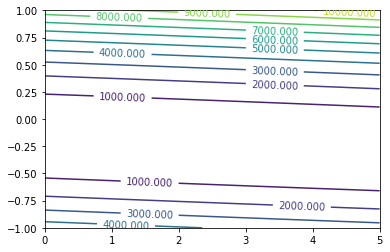

In [19]:
#这个等高线图很丑，应该是数据集的问题。以后可以试试画别的。
c = plt.contour(x,y,z,10,color='rainbow')
plt.clabel(c,inline=True,fontsize=10)

Populating the interactive namespace from numpy and matplotlib
这是第1次下降，目前的cost为26.733598825909276,theta_0=1,theta_1=0
这是第2次下降，目前的cost为7.345961096768554,theta_0=1.0483913505154638,theta_1=0.571690497455567
这是第3次下降，目前的cost为6.725516036524912,theta_0=1.0496499863143938,theta_1=0.6740537518238824
这是第4次下降，目前的cost为6.698137553211907,theta_0=1.0425433989253885,theta_1=0.6929865789714915
这是第5次下降，目前的cost为6.689527818138652,theta_0=1.0339629965806827,theta_1=0.6970872216510292
这是第6次下降，目前的cost为6.681539066237873,theta_0=1.0251337940180592,theta_1=0.6985499231789023
这是第7次下降，目前的cost为6.673597732305592,theta_0=1.0162735299617904,theta_1=0.6995423732620731
这是第8次下降，目前的cost为6.66568559171214,theta_0=1.0074208866041978,theta_1=0.7004499096734654
这是第9次下降，目前的cost为6.657801968808299,theta_0=0.9985827165240844,theta_1=0.7013410336561314
这是第10次下降，目前的cost为6.649946742847456,theta_0=0.9897602142100345,theta_1=0.7022279245836713
这是第11次下降，目前的cost为6.642119810975795,theta_0=0.9809535683932196,theta_1=0.7031127498714845
这是

/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


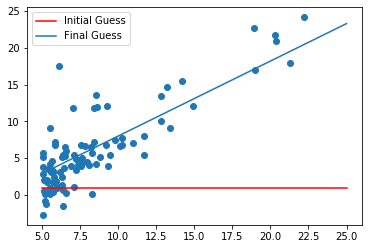

In [2]:
#数据集
%pylab inline
def cost_function(theta_0,theta_1,x,y):
    m = len(x)
    cost = sum(1/(2*m)*(theta_0+x*theta_1-y)**2)
    return cost

data = np.loadtxt('data.txt')
x = data[:,0]
y = data[:,1]
m = len(x)
theta_0 = 1
theta_1 = 0
cost = cost_function(theta_0,theta_1,x,y)
plt.scatter(x,y)
size = np.linspace(5,25,1000)
price = theta_0 + theta_1*size

plt.plot(size,price,"r-",label="Initial Guess")
plt.legend()
alpha = 0.01
epsilon = 1e-3
epoch = 1
while cost >= epsilon:
    #if epoch >= 100:
    #    break
    cost_old = cost
    print(f"这是第{epoch}次下降，目前的cost为{cost},theta_0={theta_0},theta_1={theta_1}")
    temp0 = theta_0 - alpha/m*sum(theta_0+theta_1*x-y)
    temp1 = theta_1 - alpha/m*sum((theta_0+theta_1*x-y)*x)
    theta_0 = temp0
    theta_1 = temp1
    cost = cost_function(theta_0,theta_1,x,y)
    if np.abs(cost-cost_old)<=epsilon:
        break
    epoch += 1
price = theta_0+size*theta_1
plt.plot(size,price,label="Final Guess")
plt.legend()

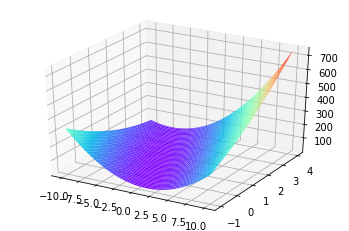

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d
figure=plt.figure()
#ax = Axes3D(figure)
ax=figure.gca(projection="3d")
x = data[:,0]
y = data[:,1]
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
X,Y = np.meshgrid(theta_0,theta_1)
Z = np.zeros([100,100])
for i in range(0,100):
    for j in range(0,100):
        Z[i,j] = cost_function(theta_0[i],theta_1[j],x,y)
ax.plot_surface(X,Y,Z,cmap="rainbow")
plt.show()#从这个图就可以很清晰地看出来了，这个cost实在是太大了，因此很容易直接发散了，对于alpha是有要求的。

/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The following kwargs were not used by contour: 'color'
  """Entry point for launching an IPython kernel.


<a list of 44 text.Text objects>

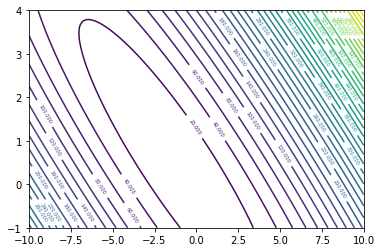

In [12]:
c = plt.contour(X,Y,Z,40,color="rainbow")
plt.clabel(c,inline=True,fontsize=5)

<a list of 11 text.Text objects>

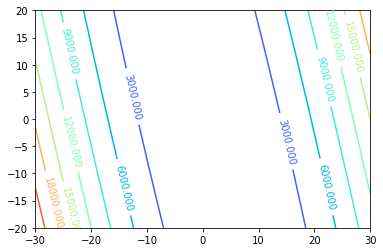

In [35]:
theta_0 = np.linspace(-30,30,1000)
theta_1 = np.linspace(-20,20,1000)
X,Y = np.meshgrid(theta_0,theta_1)
Z = np.zeros([1000,1000])
for i in range(0,1000):
    for j in range(0,1000):
        Z[i,j] = cost_function(theta_0[i],theta_1[j],x,y)
c = plt.contour(X,Y,Z,8,cmap="rainbow")
plt.clabel(c,inline=True,fontsize=10)

Populating the interactive namespace from numpy and matplotlib
[-3.89578088  1.19303364]


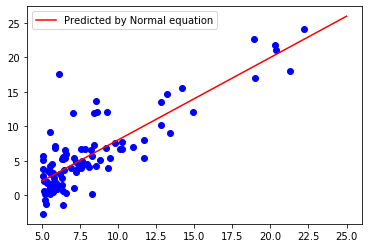

In [45]:
#希望采用正规方程的方式来做回归
%pylab inline
#载入数据集
data = np.genfromtxt('data.txt')
x = data[:,0]#提取出feature
y = data[:,1]
x.reshape(-1,1)#变形
X = np.ones([len(data),2])#准备好X这个容器
X[:,1] = x
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
print(theta)
plt.scatter(x,y,color="blue")
size = np.linspace(5,25,1000)
price = theta[0] + theta[1]*size
plt.plot(size,price,"r-",label="Predicted by Normal equation")
plt.legend()